### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [2]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])
df.head()


,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [5]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


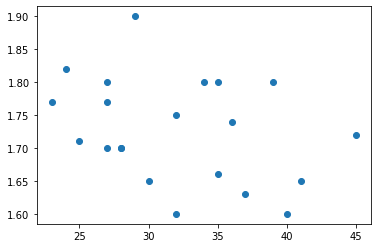

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['Edad'], df['Altura'])

<AxesSubplot:xlabel='Edad', ylabel='Altura'>

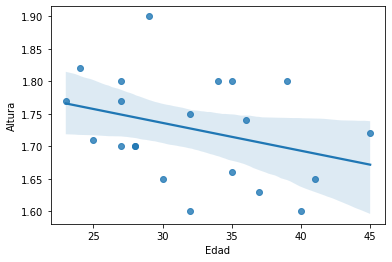

In [7]:
import seaborn as sns

sns.regplot(data=df, x="Edad", y="Altura")

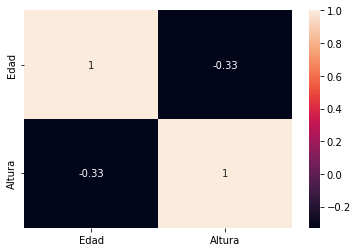

In [9]:
sns.heatmap(df.corr(), annot=True);

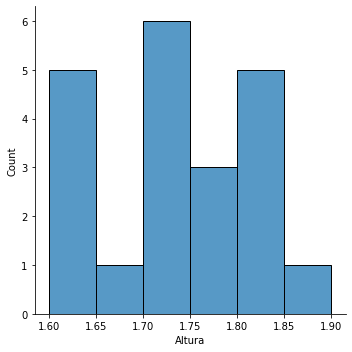

In [11]:
sns.displot(df['Altura']);

## Modelo

In [47]:
X = df[['Edad']]
y = df['Altura']

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=10)

In [49]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(21, 1)
(15, 1)
(6, 1)


In [50]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(21,)
(15,)
(6,)


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Edad
14,23
5,27
2,35
11,30
7,32
18,27


In [20]:
predictions = model.predict(X_test)
predictions

array([1.7764719 , 1.76028923, 1.72792389, 1.74815222, 1.74006089,
       1.76028923])

In [23]:
model.intercept_

1.8695222482435596

In [24]:
model.coef_

array([-0.00404567])

y = ax + b

altura = -0.004 * edad + 1.86

In [27]:
-0.004 * 35 + 1.87

1.73

In [33]:
df_eval = pd.DataFrame(X_test)
df_eval['predictions'] = predictions
df_eval['real_value'] = y_test
df_eval['error'] = abs(df_eval['predictions'] - df_eval['real_value'])
df_eval

,Edad,predictions,real_value,error
14,23,1.776472,1.77,0.006472
5,27,1.760289,1.80,0.039711
2,35,1.727924,1.66,0.067924
11,30,1.748152,1.65,0.098152
7,32,1.740061,1.60,0.140061
18,27,1.760289,1.77,0.009711


In [36]:
np.mean(df_eval['error'])

0.06033840749414521

In [37]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions, y_test)

0.06033840749414521

In [39]:
df_eval['error_cuad'] = df_eval['error'] ** 2
df_eval

,Edad,predictions,real_value,error,error_cuad
14,23,1.776472,1.77,0.006472,0.000042
5,27,1.760289,1.80,0.039711,0.001577
2,35,1.727924,1.66,0.067924,0.004614
11,30,1.748152,1.65,0.098152,0.009634
7,32,1.740061,1.60,0.140061,0.019617
18,27,1.760289,1.77,0.009711,0.000094


In [40]:
np.mean(df_eval['error_cuad'])

0.00592961611153464

In [41]:
np.sqrt(np.mean(df_eval['error_cuad']))

0.07700400062032257

In [42]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predictions, y_test)

0.00592961611153464

In [43]:
np.sqrt(mean_squared_error(predictions, y_test))

0.07700400062032257

In [56]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predictions)

0.03652442489947345

In [51]:
X_test

,Edad
14,23
5,27
2,35
11,30
7,32
18,27


In [54]:
model.score(X_train, y_train)

0.10544493837088842

In [55]:
model.predict(X_train)

array([1.71983255, 1.75624356, 1.75624356, 1.70769555, 1.73196956,
       1.72792389, 1.72387822, 1.70364988, 1.76838056, 1.71174122,
       1.76028923, 1.77242623, 1.74006089, 1.75219789, 1.68746721])

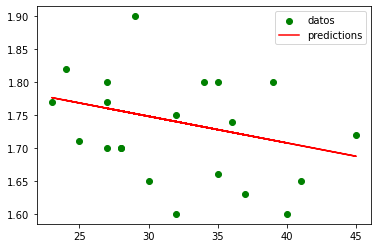

In [59]:
plt.scatter(df['Edad'], df['Altura'], color='g', label="datos")
plt.plot(df['Edad'], model.predict(X), color='r', label="predictions")
plt.legend();

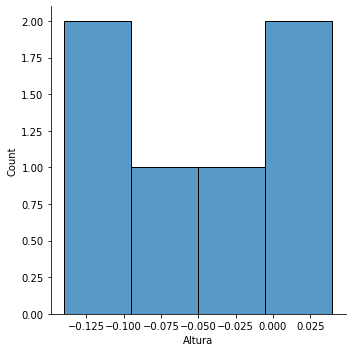

In [60]:
sns.displot(y_test-predictions);

In [63]:
model.predict([[5]])

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.84929391])